In [190]:
from scipy.stats import kstest, powerlaw
from plot_funcs import get_results, get_mean_avg_ranks, get_ranks_sizes
from statsmodels.formula.api import ols, rlm
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

Base off method from: http://snap.stanford.edu/class/cs224w-readings/clauset09powerlaw.pdf

In [191]:
results = get_results('../exp/results')

Found: 53797 Incomplete: 10.399999999999995


In [192]:
def get_divergence(ij, in_xs, in_ys, plot=False):
    
    i, j = ij
    
    if i < 0 or j < 0:
        return 10000
    
    j = -j
    if j == 0:
        j = None
    
    xs = in_xs.copy()[i:j]
    ys = in_ys.copy()[i:j]
    
    # Estimate fit
    r = linregress(np.log10(xs), np.log10(ys))
    
    # Get points from what should be fit
    p_ys = 10**(r.intercept) * (xs **(r.slope))
    
    k = kstest(ys, p_ys).statistic
    
    if plot:
        plt.scatter(xs, p_ys)
        plt.scatter(xs, ys)
        print(k)
    
    # Return kstest
    return k

def get_min_max_bounds(r_df, plot=False):
    
    # To array
    xs = np.array(r_df['Size'])
    ys = np.array(r_df['Mean_Rank'])
 
    up_to = len(xs) // 2

    # First estimate lower bound
    options = [(i, 0) for i in range(up_to)]
    divergences = [get_divergence(o, xs, ys) for o in options]
    i = options[np.argmin(divergences)][0]

    # Estimate upper based on lower
    options = [(i, j) for j in range(up_to)]
    divergences = [get_divergence(o, xs, ys) for o in options]
    j = options[np.argmin(divergences)][1]
    
    if plot:
        get_divergence((i, j), xs, ys, plot=True)
        
    return i, j

0.10714285714285714


(0, 9)

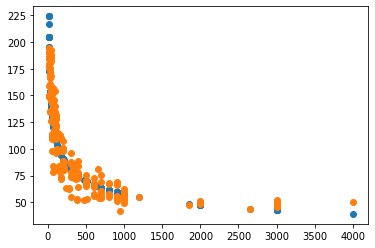

In [196]:
r_df = get_ranks_sizes(results, log=False,
                       random=True, base=True,
                       ico=True, fs=True).sort_values('Size')

get_min_max_bounds(r_df, plot=True)